In [131]:
import ssl

import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

In [132]:
import pandas as pd

odf = pd.read_csv("https://npg-ds.s3.amazonaws.com/bike_sharing.csv")
odf.copy()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [133]:
# copy the dataframe from later usage
df = odf.copy()

The dataset has the following features:

1. Datetime: hourly date + timestamp
2. Season:
    - 1 = spring
    - 2 = summer
    - 3 = fall
    - 4 = winter
3. Holiday: whether the day is considered a holiday
4. Workingday: whether the day is neither a weekend nor holiday
5. Weather:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. Temp: temperature in Celsius
7. Atemp: "feels like" temperature in Celsius
8. Humidity: relative humidity
9. Windspeed: wind speed
10. Casual: number of non-registered user rentals initiated
11. Registered: number of registered user rentals initiated
12. Count: number of total rentals

Let's see some statistics on the data.

In [134]:
df.copy().describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Let's now start checking for some initial statistics about our dataset. For instance we could check for null values per feature:

In [135]:
df.copy().isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Now let's convert the dates into timestamps.

In [136]:
from datetime import datetime
df["datetime"] = df["datetime"].apply(lambda x: datetime.fromisoformat(x).timestamp())

We have some categorical data we need to properly encode.

In [137]:
from category_encoders import TargetEncoder


df["season"] = df["season"].apply(lambda x: str(x))
df["holiday"] = df["holiday"].apply(lambda x: str(x))
df["workingday"] = df["workingday"].apply(lambda x: str(x))


# encode categorical data
ndf = TargetEncoder().fit_transform(df['season'], df["count"])
df["season"] = ndf

ndf = TargetEncoder().fit_transform(df['holiday'], df["count"])
df["holiday"] = ndf

ndf = TargetEncoder().fit_transform(df['workingday'], df["count"])
df["workingday"] = ndf
df.copy()

/Users/npg/Library/Caches/pypoetry/virtualenvs/mlucu-Vdmf4rJI-py3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1.293847e+09,116.343261,191.741655,188.506621,1,9.84,14.395,81,0.0000,3,13,16
1,1.293851e+09,116.343261,191.741655,188.506621,1,9.02,13.635,80,0.0000,8,32,40
2,1.293854e+09,116.343261,191.741655,188.506621,1,9.02,13.635,80,0.0000,5,27,32
3,1.293858e+09,116.343261,191.741655,188.506621,1,9.84,14.395,75,0.0000,3,10,13
4,1.293862e+09,116.343261,191.741655,188.506621,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.355951e+09,198.988296,191.741655,193.011873,1,15.58,19.695,50,26.0027,7,329,336
10882,1.355954e+09,198.988296,191.741655,193.011873,1,14.76,17.425,57,15.0013,10,231,241
10883,1.355958e+09,198.988296,191.741655,193.011873,1,13.94,15.910,61,15.0013,4,164,168
10884,1.355962e+09,198.988296,191.741655,193.011873,1,13.94,17.425,61,6.0032,12,117,129


We'll now have to normalize the values.

In [138]:
# normalize everything but the count
cols = df.columns.difference(['count'])
df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()
df.copy()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,-1.711453,-1.677181,0.171483,-1.460605,-0.660148,-1.333599,-1.092687,0.993167,-1.567682,-0.660962,-0.943810,16
1,-1.711255,-1.677181,0.171483,-1.460605,-0.660148,-1.438841,-1.182367,0.941206,-1.567682,-0.560882,-0.818015,40
2,-1.711057,-1.677181,0.171483,-1.460605,-0.660148,-1.438841,-1.182367,0.941206,-1.567682,-0.620930,-0.851119,32
3,-1.710859,-1.677181,0.171483,-1.460605,-0.660148,-1.333599,-1.092687,0.681399,-1.567682,-0.660962,-0.963673,13
4,-1.710661,-1.677181,0.171483,-1.460605,-0.660148,-1.333599,-1.092687,0.681399,-1.567682,-0.721009,-1.023260,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.703142,0.165290,0.171483,0.684585,-0.660148,-0.596908,-0.467289,-0.617638,1.617153,-0.580898,1.148364,336
10882,1.703340,0.165290,0.171483,0.684585,-0.660148,-0.702149,-0.735148,-0.253908,0.269691,-0.520851,0.499525,241
10883,1.703538,0.165290,0.171483,0.684585,-0.660148,-0.807391,-0.913917,-0.046062,0.269691,-0.640946,0.055931,168
10884,1.703736,0.165290,0.171483,0.684585,-0.660148,-0.807391,-0.735148,-0.046062,-0.832404,-0.480819,-0.255246,129


Let's check the correlation matrix.

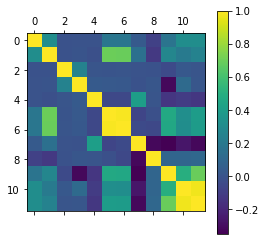

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.313406,-0.010985,-0.003657,-0.005051,0.181057,0.181893,0.032860,-0.086893,0.172757,0.314893,0.310206
season,0.313406,1.000000,-0.007620,0.000136,-0.019853,0.697446,0.692124,0.150192,-0.126915,0.271964,0.207020,0.247623
holiday,-0.010985,-0.007620,1.000000,0.250491,0.007074,-0.000295,0.005215,-0.001929,-0.008409,-0.043799,0.020956,0.005393
workingday,-0.003657,0.000136,0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005051,-0.019853,0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.181057,0.697446,-0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181893,0.692124,0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032860,0.150192,-0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086893,-0.126915,-0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172757,0.271964,-0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


In [139]:
import matplotlib.pyplot as plt

# plot heatmap
plt.matshow(df.corr())
cb = plt.colorbar()
plt.show()

# show numerical values
df.corr()

From the correlation matrix we can observe:

1. Temp and Atemp are highly correlated. This make sense as we can expect people to to have a "feel" for the temperature close to the actual number. We can probably be okay using one of them. Let's keep Temp as is a more objective value.
2. Holiday and workday are totally correlated. Makes sense given that a day is either a workday or a holiday. We are okay keeping one of this, let's use holiday.
3. Windspeed and Humidity - High correlated fields, we'll keep windspeed.
4. Registered vs Casual, both represent the same concept, whether the user is registered or not. We are going to keep only registered.

In [140]:
df = df.drop("atemp", axis=1)
df = df.drop("holiday", axis=1)
df = df.drop("casual", axis=1)
df = df.drop("registered", axis=1)
df.copy()

,datetime,season,workingday,weather,temp,humidity,windspeed,count
0,-1.711453,-1.677181,-1.460605,-0.660148,-1.333599,0.993167,-1.567682,16
1,-1.711255,-1.677181,-1.460605,-0.660148,-1.438841,0.941206,-1.567682,40
2,-1.711057,-1.677181,-1.460605,-0.660148,-1.438841,0.941206,-1.567682,32
3,-1.710859,-1.677181,-1.460605,-0.660148,-1.333599,0.681399,-1.567682,13
4,-1.710661,-1.677181,-1.460605,-0.660148,-1.333599,0.681399,-1.567682,1
...,...,...,...,...,...,...,...,...
10881,1.703142,0.165290,0.684585,-0.660148,-0.596908,-0.617638,1.617153,336
10882,1.703340,0.165290,0.684585,-0.660148,-0.702149,-0.253908,0.269691,241
10883,1.703538,0.165290,0.684585,-0.660148,-0.807391,-0.046062,0.269691,168
10884,1.703736,0.165290,0.684585,-0.660148,-0.807391,-0.046062,-0.832404,129


Let's now search the data for outliers

In [141]:
# from sklearn.ensemble import IsolationForest
#
# # estimate outliers
# df["outlier"] = IsolationForest().fit_predict(df)
# print("Outliers detected:", abs(df[df.outlier == -1]["outlier"].sum()))
#
# # remove outliers (-1), keep inliers (1)
# df = df[df.outlier == 1]
# df = df.drop("outlier", axis=1).reset_index()
# df = df.drop("index", axis=1)
# df.copy()

Now we can start training our model. First let's split our data in test and training.

In [142]:
from sklearn.model_selection import train_test_split

# split data for train and test
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

# split into features and labels
training_features = training_data.copy()
training_features = training_features.drop("count", axis=1)
training_labels = training_data["count"]

# split into features and labels
testing_features = pd.DataFrame(testing_data.copy())
testing_features = testing_features.drop("count", axis=1)
testing_labels = pd.DataFrame(testing_data["count"])

Now we can train our model. In this case we will use linear regression.

In [143]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# train model
kernel = DotProduct() + WhiteKernel()
linear_regression = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(training_features, training_labels)

training_score = linear_regression.score(training_features, training_labels)
test_score = linear_regression.score(testing_features, testing_labels)

print(f"Training Score: {training_score}")
print(f"Test Score: {test_score}")

KeyboardInterrupt: 